In [104]:
# Cell 1: Import Libraries and Load the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = '../data/heart_disease_uci.csv'
df = pd.read_csv(DATA_PATH)

In [105]:
# Cell 2: Display the first 5 rows

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [106]:
# Cell 3: The "information card" will give us the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalach   865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [107]:
# Cell 4: Calculate and display the percentage of missing values for each column

missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values:\n")
print(missing_percentage)

Percentage of missing values:

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalach      5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


In [108]:
# Cell 5: Inspect unique values of key 'object' columns

print(" Inspecting Categorical Features ")
print("\nUnique values for 'sex':", df['sex'].unique())
print("Unique values for 'cp' (chest pain):", df['cp'].unique())
print("Unique values for 'fbs' (fasting blood sugar):", df['fbs'].unique())
print("Unique values for 'restecg':", df['restecg'].unique())
print("Unique values for 'exang' (exercise angina):", df['exang'].unique())
print("Unique values for 'slope':", df['slope'].unique())
print("Unique values for 'thal':", df['thal'].unique())

 Inspecting Categorical Features 

Unique values for 'sex': ['Male' 'Female']
Unique values for 'cp' (chest pain): ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
Unique values for 'fbs' (fasting blood sugar): [True False nan]
Unique values for 'restecg': ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
Unique values for 'exang' (exercise angina): [False True nan]
Unique values for 'slope': ['downsloping' 'flat' 'upsloping' nan]
Unique values for 'thal': ['fixed defect' 'normal' 'reversable defect' nan]


In [109]:
# Cell 6: Define the Target Variable

print("\n Defining Target Variable ")
print("Original 'num' values:", df['num'].unique())

df['target'] = (df['num'] > 0).astype(int)

print("New 'target' values:", df['target'].unique())
print("\nCheck the first 5 rows to see the new 'target' column:")
df.head()


 Defining Target Variable 
Original 'num' values: [0 2 1 3 4]
New 'target' values: [0 1]

Check the first 5 rows to see the new 'target' column:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


In [110]:
# Cell 7: Drop columns that are irrelevant or have too much missing data

df_cleaned = df.drop(['id', 'dataset', 'num', 'ca', 'slope', 'thal'], axis=1)

print(" Columns after dropping: ")
print(df_cleaned.columns)

 Columns after dropping: 
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'target'],
      dtype='object')


In [111]:
# Cell 8: Encode Binary Features (Sex, Fbs, Exang)

df_cleaned['sex'] = df_cleaned['sex'].map({'Male':1, 'Female': 0})
df_cleaned['exang'] = df_cleaned['exang'].map({True: 1, False: 0})
df_cleaned['fbs'] = df_cleaned['fbs'].map({True: 1, False: 0})

print("Data after Binary Encoding (Head):")
print(df_cleaned.head())

Data after Binary Encoding (Head):
   age  sex               cp  trestbps   chol  fbs         restecg  thalach  \
0   63    1   typical angina     145.0  233.0  1.0  lv hypertrophy    150.0   
1   67    1     asymptomatic     160.0  286.0  0.0  lv hypertrophy    108.0   
2   67    1     asymptomatic     120.0  229.0  0.0  lv hypertrophy    129.0   
3   37    1      non-anginal     130.0  250.0  0.0          normal    187.0   
4   41    0  atypical angina     130.0  204.0  0.0  lv hypertrophy    172.0   

   exang  oldpeak  target  
0    0.0      2.3       0  
1    1.0      1.5       1  
2    1.0      2.6       1  
3    0.0      3.5       0  
4    0.0      1.4       0  


In [112]:
# Cell 9: Impute (fill) remaining missing values

# Strategy 1: Filling Numerical columns with MEDIAN
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Strategy 2: Filling Categorical columns (objects) with MODE
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in cat_cols:
    # [0] is used because mode() returns a Series
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

print("--- Checking for missing values after imputation: ---")
print(df_cleaned.isnull().sum())

--- Checking for missing values after imputation: ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64


In [113]:
# Cell 10: Performing One-Hot Encoding for remaining categorical features

df_processed = pd.get_dummies(df_cleaned, columns=['cp', 'restecg'], drop_first=True)

print("Data after One-Hot Encoding (Head):")
print(df_processed.head())

Data after One-Hot Encoding (Head):
   age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  target  \
0   63    1     145.0  233.0  1.0    150.0    0.0      2.3       0   
1   67    1     160.0  286.0  0.0    108.0    1.0      1.5       1   
2   67    1     120.0  229.0  0.0    129.0    1.0      2.6       1   
3   37    1     130.0  250.0  0.0    187.0    0.0      3.5       0   
4   41    0     130.0  204.0  0.0    172.0    0.0      1.4       0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0               False           False               True           False   
1               False           False              False           False   
2               False           False              False           False   
3               False            True              False            True   
4                True           False              False           False   

   restecg_st-t abnormality  
0                     False  
1                     Fals

In [114]:
# Cell 11: Final check of the processed data
print("Final Processed Data Info:")
df_processed.info()
print(df_processed.head())

Final Processed Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    float64
 5   thalach                   920 non-null    float64
 6   exang                     920 non-null    float64
 7   oldpeak                   920 non-null    float64
 8   target                    920 non-null    int64  
 9   cp_atypical angina        920 non-null    bool   
 10  cp_non-anginal            920 non-null    bool   
 11  cp_typical angina         920 non-null    bool   
 12  restecg_normal            920 non-null    bool   
 13  restecg_st-t abnormality  920 non-null

In [115]:
# Cell 12: Set style for our visualizations
sns.set_style("whitegrid") 
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### How many people are sick and how many are not in our data? Is it balanced?

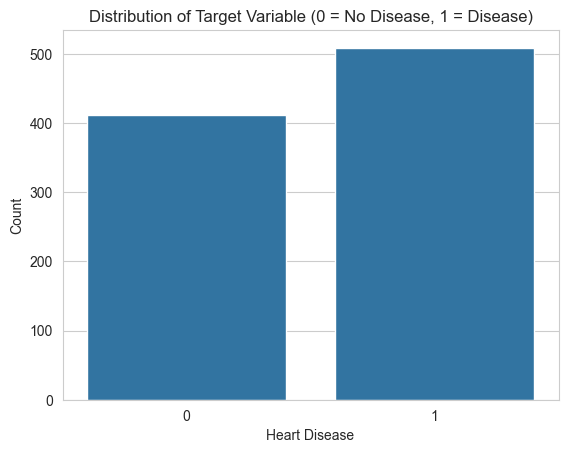

In [116]:
# Cell 13: Plotting the Target variable distribution
sns.countplot(x='target', data=df_processed)
plt.title('Distribution of Target Variable (0 = No Disease, 1 = Disease)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

### How does age affect disease? (Histogram)

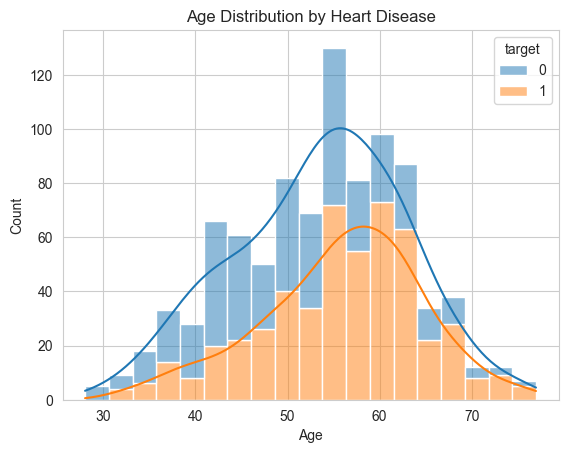

In [117]:
# Cell 14: Plotting Age distribution vs. Heart Disease
sns.histplot(data=df_processed, x='age', hue='target', multiple='stack', kde=True)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### This is the most important graph in the exploration phase. It will show us the "correlation matrix".

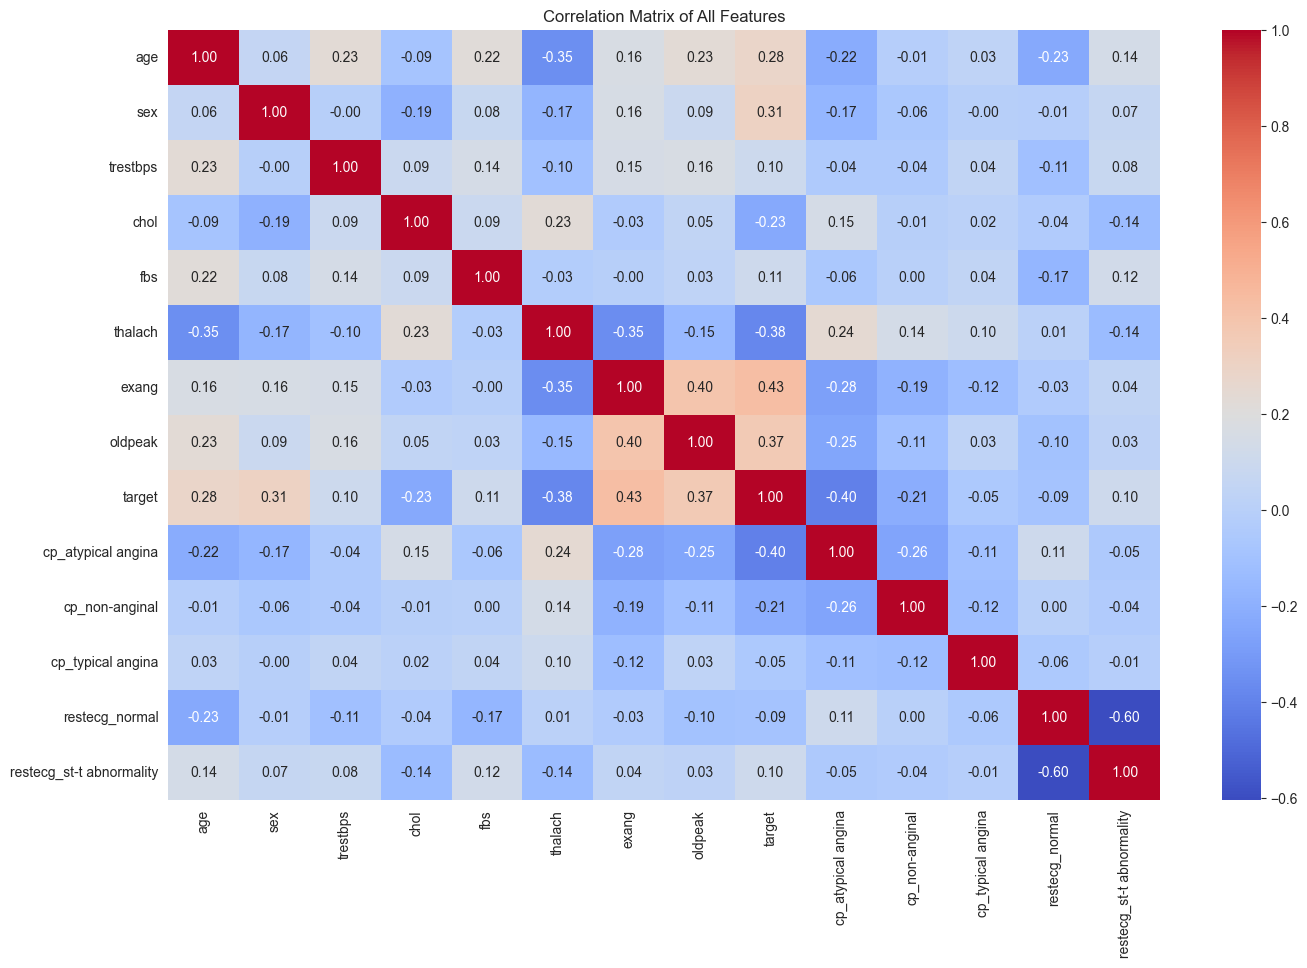

In [118]:
# Cell 15: Correlation Heatmap
plt.figure(figsize=(16, 10))
corr_matrix = df_processed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Features')
plt.show()

## Dimensionality Reduction

In [119]:
# Cell 16: Separate Features (X) & Target (y) and Apply Scaling

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_processed.drop('target', axis=1)
y = df_processed['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(" Data Scaled Successfully")
print("Original shape of X:", X.shape)
print("Shape of X_scaled:", X_scaled.shape)

 Data Scaled Successfully
Original shape of X: (920, 13)
Shape of X_scaled: (920, 13)


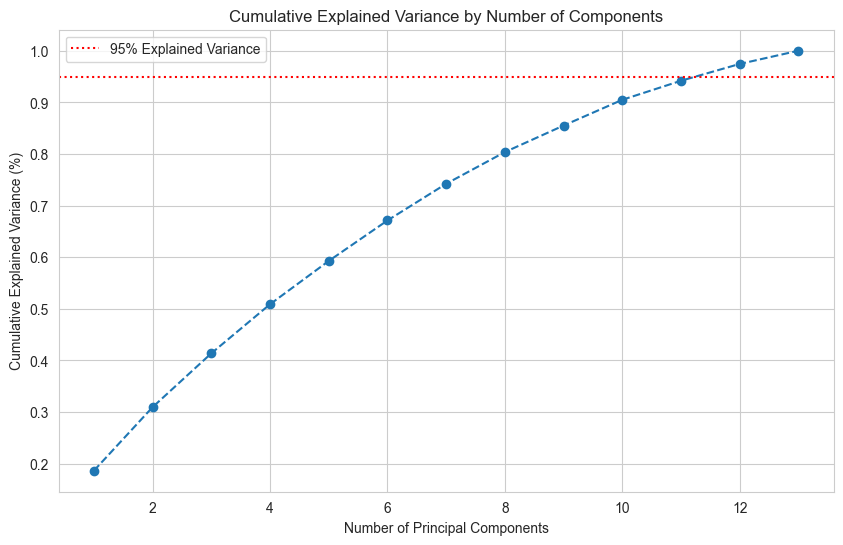

In [120]:
# Cell 17: Apply PCA and Plot Cumulative Explained Variance

pca_analysis = PCA()
pca_analysis.fit(X_scaled)

explained_variance_ratio = pca_analysis.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True)

plt.axhline(y=0.95, color='r', linestyle=':', label='95% Explained Variance')
plt.legend()
plt.show()

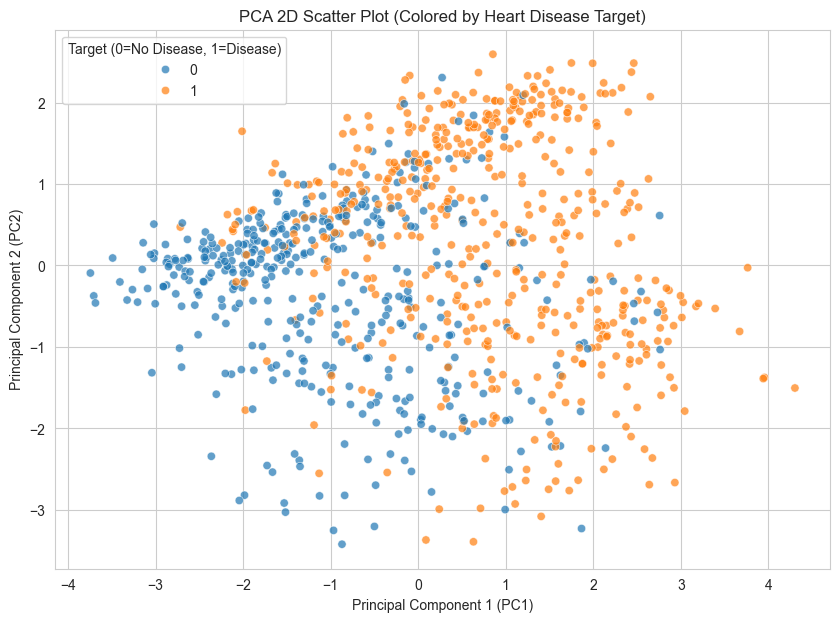

In [121]:
# Cell 18: Visualize the data in 2D using PCA

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_2d_df = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
pca_2d_df['target'] = y

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_2d_df, alpha=0.7)
plt.title('PCA 2D Scatter Plot (Colored by Heart Disease Target)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Target (0=No Disease, 1=Disease)')
plt.show()

## Feature Selection

In [122]:
# Cell 19: Train Random Forest to get Feature Importances

from sklearn.ensemble import RandomForestClassifier

X = df_processed.drop('target', axis=1)
y = df_processed['target']

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

importances = rf_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances (Top 5):")
print(importance_df.head())

Feature Importances (Top 5):
   Feature  Importance
3     chol    0.169272
5  thalach    0.148563
0      age    0.123159
7  oldpeak    0.121563
6    exang    0.108551


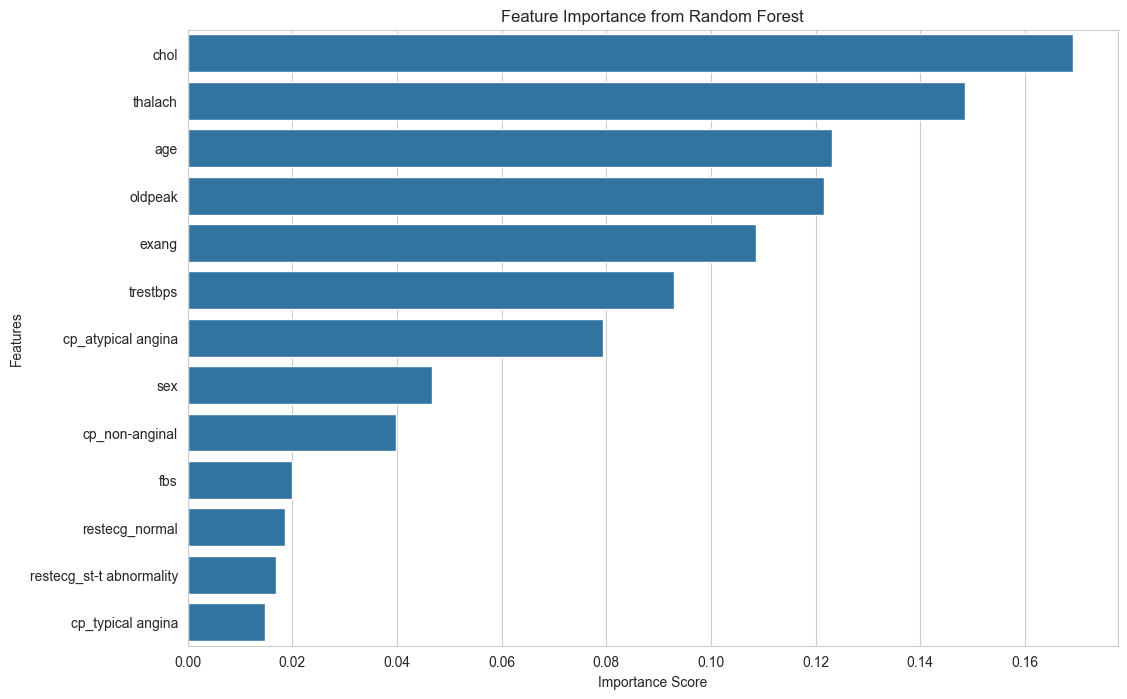

In [123]:
# Cell 20: Plot Feature Importances

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [124]:
# Cell 21: Feature Selection using RFE (Recursive Feature Elimination)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr_model, n_features_to_select=5)

rfe.fit(X_scaled, y)

rfe_ranking = rfe.ranking_
rfe_support = rfe.support_

rfe_df = pd.DataFrame({
    'Feature': feature_names,
    'RFE_Support': rfe_support, 
    'RFE_Rank': rfe_ranking
})

print("RFE Results (Sorted by Rank):")
print(rfe_df.sort_values(by='RFE_Rank'))

RFE Results (Sorted by Rank):
                     Feature  RFE_Support  RFE_Rank
1                        sex         True         1
5                    thalach         True         1
7                    oldpeak         True         1
8         cp_atypical angina         True         1
9             cp_non-anginal         True         1
6                      exang        False         2
3                       chol        False         3
0                        age        False         4
10         cp_typical angina        False         5
4                        fbs        False         6
2                   trestbps        False         7
11            restecg_normal        False         8
12  restecg_st-t abnormality        False         9


In [125]:
# Cell 22: Feature Selection using Chi-Square Test

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

scaler_chi2 = MinMaxScaler()
X_scaled_chi2 = scaler_chi2.fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_scaled_chi2, y)

chi2_scores = chi2_selector.scores_

chi2_df = pd.DataFrame({
    'Feature': feature_names,
    'Chi2_Score': chi2_scores
})

print("\nChi-Square Test Results (Sorted by Score):")
print(chi2_df.sort_values(by='Chi2_Score', ascending=False))


Chi-Square Test Results (Sorted by Score):
                     Feature  Chi2_Score
8         cp_atypical angina  121.437148
6                      exang  109.611826
9             cp_non-anginal   31.519125
1                        sex   18.318202
4                        fbs    9.133272
12  restecg_st-t abnormality    8.130710
5                    thalach    7.680281
0                        age    5.218891
3                       chol    4.752465
7                    oldpeak    4.538426
11            restecg_normal    3.212138
10         cp_typical angina    2.612469
2                   trestbps    0.121554


## Building Classification Models - Supervised Learning

In [126]:
# Cell 23: Split the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Data Split Successfully")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data Split Successfully
X_train shape: (736, 13)
X_test shape: (184, 13)
y_train shape: (736,)
y_test shape: (184,)


In [127]:
# Cell 24: Model 1 - Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initializeing and Training the Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# 2. Makeing Predictions on the Test Set
y_pred_lr = log_reg.predict(X_test)

# 3. Evaluate the Model
print(" Logistic Regression Results ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

 Logistic Regression Results 
Accuracy: 82.61%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        82
           1       0.82      0.88      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.82       184



In [128]:
# Cell 25: Initializeing a dictionary to store model results
model_accuracies = {}
model_accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred_lr)

print("Results dictionary initialized.")

Results dictionary initialized.


In [129]:
# Cell 26: Model 2 - Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

model_accuracies['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

Decision Tree Results
Accuracy: 77.17%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        82
           1       0.78      0.81      0.80       102

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



In [130]:
# Cell 27: Model 3 - Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(" Random Forest Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

model_accuracies['Random Forest'] = accuracy_score(y_test, y_pred_rf)

 Random Forest Results
Accuracy: 83.15%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        82
           1       0.83      0.87      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



In [131]:
# Cell 28: Model 4 - Support Vector Machine (SVM)

from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print(" Support Vector Machine (SVM) Results ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

model_accuracies['SVM'] = accuracy_score(y_test, y_pred_svm)

 Support Vector Machine (SVM) Results 
Accuracy: 83.15%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        82
           1       0.83      0.88      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



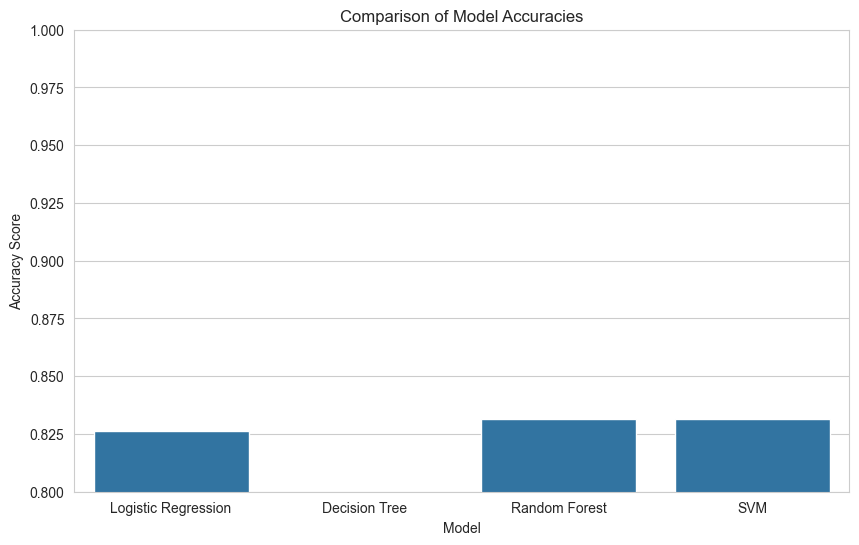

In [132]:
# Cell 29: Compare Model Accuracies with a Bar Plot

model_comparison = pd.Series(model_accuracies)

plt.figure(figsize=(10, 6))
sns.barplot(x=model_comparison.index, y=model_comparison.values)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0.8, 1.0)
plt.show()

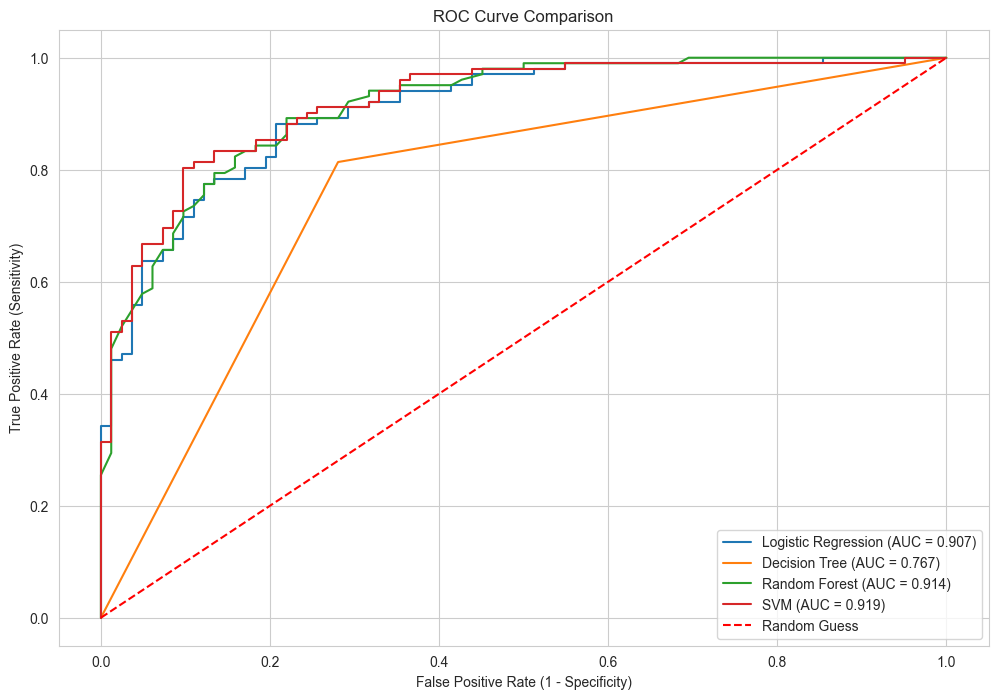

In [133]:
# Cell 30: Plot ROC Curve for all models

from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(12, 8))

def plot_roc_curve(model, X_test, y_test, label):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.3f})')

plot_roc_curve(log_reg, X_test, y_test, 'Logistic Regression')
plot_roc_curve(dt_model, X_test, y_test, 'Decision Tree')
plot_roc_curve(rf_model, X_test, y_test, 'Random Forest')
plot_roc_curve(svm_model, X_test, y_test, 'SVM')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Unsupervised Learning

In [134]:
# Cell 31: Calculate K-Means Inertia for the Elbow Method

from sklearn.cluster import KMeans

inertia_values = []
possible_k_values = range(1, 11) # Test K from 1 to 10

for k in possible_k_values:
    kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    
    kmeans_model.fit(X_scaled)
    
    inertia_values.append(kmeans_model.inertia_)

print("Inertia values calculated for K=1 to 10")
print(inertia_values)

Inertia values calculated for K=1 to 10
[11960.000000000004, 10392.897083980493, 9414.169947811102, 8490.568279675745, 7923.627476528638, 7175.305902366929, 6763.6302389708635, 6434.789423801842, 6194.065249709249, 6009.810911898781]


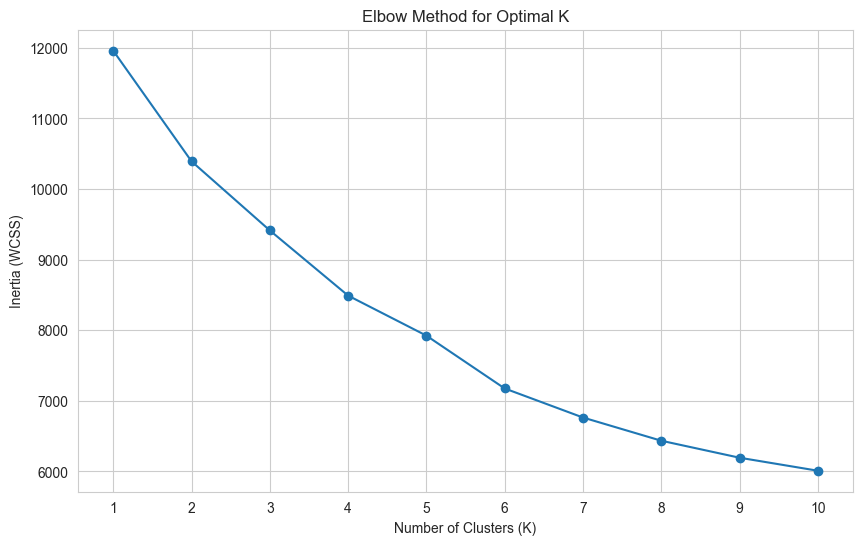

In [135]:
# Cell 32: Plot the Elbow Method curve

plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

In [136]:
# Cell 33: Apply K-Means with the optimal K=3

optimal_k = 3
kmeans_model_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans_model_final.fit(X_scaled)

cluster_labels = kmeans_model_final.labels_

df_clustered = df_processed.copy()
df_clustered['kmeans_cluster'] = cluster_labels

print(f" Successfully applied K-Means with K={optimal_k} ")
print("First 5 rows with new cluster labels:")
print(df_clustered.head())

 Successfully applied K-Means with K=3 
First 5 rows with new cluster labels:
   age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  target  \
0   63    1     145.0  233.0  1.0    150.0    0.0      2.3       0   
1   67    1     160.0  286.0  0.0    108.0    1.0      1.5       1   
2   67    1     120.0  229.0  0.0    129.0    1.0      2.6       1   
3   37    1     130.0  250.0  0.0    187.0    0.0      3.5       0   
4   41    0     130.0  204.0  0.0    172.0    0.0      1.4       0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0               False           False               True           False   
1               False           False              False           False   
2               False           False              False           False   
3               False            True              False            True   
4                True           False              False           False   

   restecg_st-t abnormality  kmeans_cluster 


 Cluster Comparison (K-Means vs. Actual Target) 
Rows = K-Means Cluster | Columns = Actual Target (0=No, 1=Yes)
target            0    1
kmeans_cluster          
0               289   80
1                71  311
2                51  118


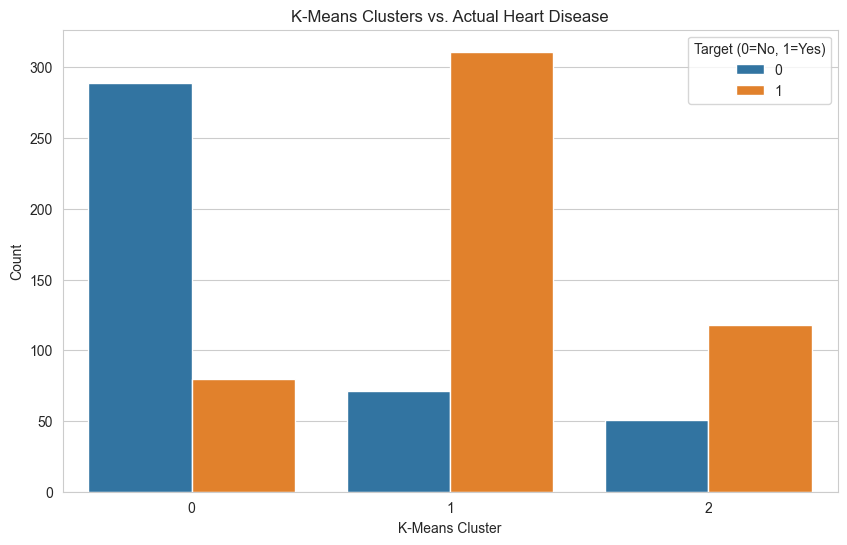

In [137]:
# Cell 34: Compare K-Means clusters with the actual 'target'

cluster_comparison = pd.crosstab(df_clustered['kmeans_cluster'], df_clustered['target'])

print("\n Cluster Comparison (K-Means vs. Actual Target) ")
print("Rows = K-Means Cluster | Columns = Actual Target (0=No, 1=Yes)")
print(cluster_comparison)

plt.figure(figsize=(10, 6))
sns.countplot(x='kmeans_cluster', hue='target', data=df_clustered)
plt.title('K-Means Clusters vs. Actual Heart Disease')
plt.xlabel('K-Means Cluster')
plt.ylabel('Count')
plt.legend(title='Target (0=No, 1=Yes)')
plt.show()

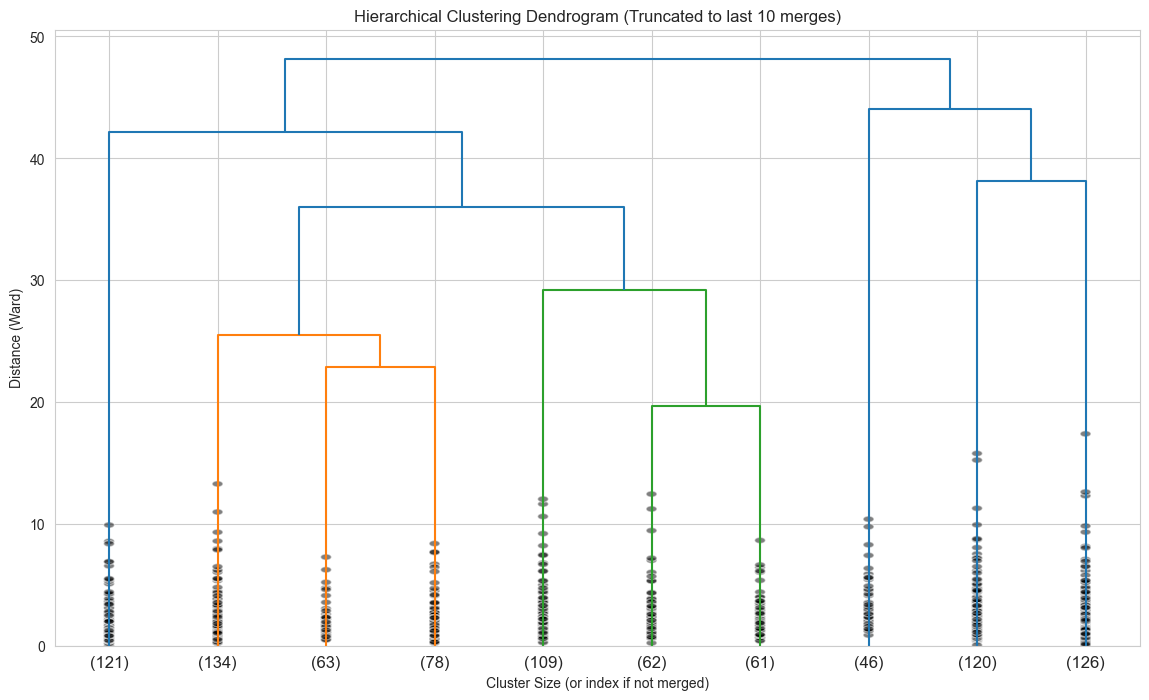

In [138]:
# Cell 35: Plot the Hierarchical Clustering Dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(14, 8))
dendrogram(linked,
           orientation='top',
           truncate_mode='lastp',  # Show only the last 'p' merged clusters
           p=10,                   # We set p=10
           show_leaf_counts=True,  # Show how many points are in each leaf
           show_contracted=True)   # To show contracted branches

plt.title('Hierarchical Clustering Dendrogram (Truncated to last 10 merges)')
plt.xlabel('Cluster Size (or index if not merged)')
plt.ylabel('Distance (Ward)')
plt.show()

## Hyperparameter Tuning

In [139]:
# Cell 36: Hyperparameter Tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_base = RandomForestClassifier(random_state=42)

rf_random_search = RandomizedSearchCV(estimator=rf_base, 
                                      param_distributions=param_grid, 
                                      n_iter=100, 
                                      cv=5, 
                                      verbose=2, 
                                      random_state=42, 
                                      n_jobs=-1)

print("Starting Randomized Search")
rf_random_search.fit(X_train, y_train)

print("Randomized Search Finished")

Starting Randomized Search
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Randomized Search Finished


In [140]:
# Cell 37: Evaluate the Best Model from Randomized Search

best_params = rf_random_search.best_params_
print(f"Best Parameters found: {best_params}")

best_rf_model = rf_random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

print("\n Optimized Random Forest Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))

model_accuracies['Optimized Random Forest'] = accuracy_score(y_test, y_pred_best_rf)

Best Parameters found: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}

 Optimized Random Forest Results
Accuracy: 81.52%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.78        82
           1       0.81      0.86      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



### GridSearchCV

In [141]:
# Cell 38: Hyperparameter Tuning with GridSearchCV (Focused Search)

from sklearn.model_selection import GridSearchCV

param_grid_focused = {
    'n_estimators': [150, 200, 250],           
    'max_depth': [8, 10, 12],                 
    'min_samples_split': [8, 10, 12],         
    'min_samples_leaf': [1, 2, 3],            
    'max_features': ['sqrt']                
}

rf_base = RandomForestClassifier(random_state=42)

param_grid_focused_fast = {
    'n_estimators': [200, 250],            # 2 values
    'max_depth': [10, 12],                 # 2 values
    'min_samples_split': [10],             # 1 value
    'min_samples_leaf': [2],               # 1 value
    'max_features': ['sqrt']               # 1 value
}

grid_search = GridSearchCV(estimator=rf_base, 
                           param_grid=param_grid_focused_fast, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

print("Starting Grid Search (Focused)")
grid_search.fit(X_train, y_train)

print("Grid Search Finished!")

Starting Grid Search (Focused)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Grid Search Finished!


In [143]:
# Cell 39: Evaluate the Best Model from Grid Search

best_params_grid = grid_search.best_params_
print(f"Best Parameters found (GridSearch): {best_params_grid}")

best_rf_model_grid = grid_search.best_estimator_
y_pred_best_grid = best_rf_model_grid.predict(X_test)

print("\nGridSearch Optimized RF Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_grid) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_grid))

model_accuracies['GridSearch RF'] = accuracy_score(y_test, y_pred_best_grid)

Best Parameters found (GridSearch): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

GridSearch Optimized RF Results
Accuracy: 81.52%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.78        82
           1       0.81      0.86      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



## Model Export

In [ ]:
# Cell 40: Create the 'models' directory

import os

model_dir = '../models'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Directory '{model_dir}' created successfully.")
else:
    print(f"Directory '{model_dir}' already exists.")

Directory '../models' created successfully.


In [145]:
# Cell 41: Save the Model and the Scaler

import joblib

model_path = os.path.join(model_dir, 'final_model.pkl')
scaler_path = os.path.join(model_dir, 'scaler.pkl')

final_model = grid_search.best_estimator_

final_scaler = scaler 

joblib.dump(final_model, model_path)
joblib.dump(final_scaler, scaler_path)

print(f" Model and Scaler Saved Successfully ")
print(f"Model saved to: {model_path}")
print(f"Scaler saved to: {scaler_path}")

 Model and Scaler Saved Successfully 
Model saved to: ../models\final_model.pkl
Scaler saved to: ../models\scaler.pkl
